In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

dotphi = 10.57
g = 9.8
b = 0.284

def ftn(z,t):
    theta = z[0]
    dtheta = z[1]
    phi = z[2]
    dphi = z[3]
    dthetadt = dtheta
    ddthetadt = - (g / b) * np.sin(theta) + np.sin(theta) * np.cos(theta) * dphi * dphi
    dphidt = 5.281 / np.sin(theta) ** 2
    dzdt = [dthetadt, ddthetadt, dphidt, 0]
    return dzdt

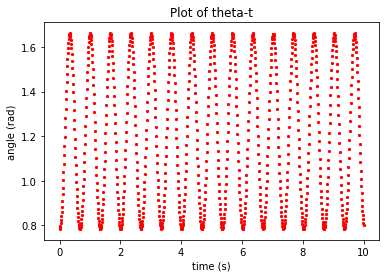

In [16]:
z0 = [0.785, 0, 0, 10.57]
n = 1000
    
t = np.linspace(0, 10, n)
x1 = np.empty_like(t)
x2 = np.empty_like(t)
x3 = np.empty_like(t)
x4 = np.empty_like(t)
x1[0] = z0[0]
x2[0] = z0[1]
x3[0] = z0[2]
x4[0] = z0[3]


for i in range (1,n):
    tspan = [t[i-1], t[i]]
    z = odeint(ftn, z0, tspan)
    x1[i] = z[1][0]
    x2[i] = z[1][1]
    x3[i] = z[1][2]
    x4[i] = z[1][3]
    z0 = z[1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(t,x1,marker='x',color='red', s=5)
plt.xlabel('time (s)')
plt.ylabel('angle (rad)')
plt.title('Plot of theta-t')
plt.show()